<a href="https://colab.research.google.com/github/SayuruA/Basics-of-Image-Processing/blob/main/Fitting_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# image path
im_path = "/content/drive/MyDrive/ImageProcessing/Images-20240814/fitting/the_berry_farms_sunflower_field.jpeg"

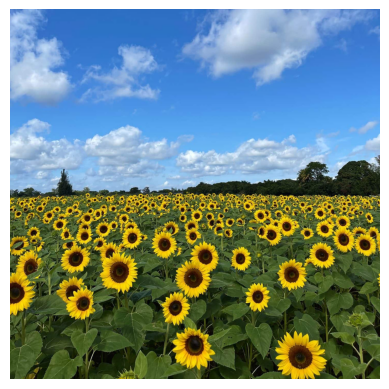

In [17]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# show image
im = cv.imread(im_path)
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis('off')
plt.show()



### Using the available blob detector.

---



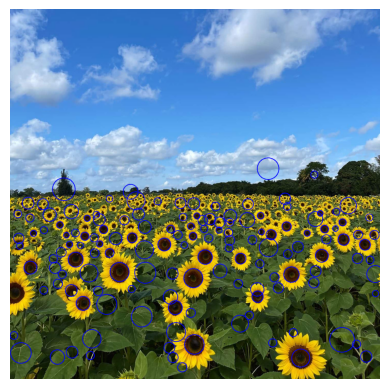

In [83]:
# Read image
im_color = cv.imread(im_path, cv.IMREAD_COLOR)
im_color= cv.cvtColor(im_color, cv.COLOR_BGR2RGB)

im = cv.cvtColor(im_color, cv.COLOR_BGR2HSV)[:,:,2]


params = cv.SimpleBlobDetector_Params()

# # Change thresholds
# params.minThreshold = 0;
# params.maxThreshold = 10000;

# Filter by Area.
params.filterByArea = True
params.minArea = 400

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(im)

for keypoint in keypoints:
    x, y = int(keypoint.pt[0]), int(keypoint.pt[1])
    radius = int(keypoint.size / 2)
    cv.circle(im_color, (x, y), radius, (0, 0, 255), thickness=2)


# Show keypoints
plt.imshow(im_color)
plt.axis('off')
plt.show()


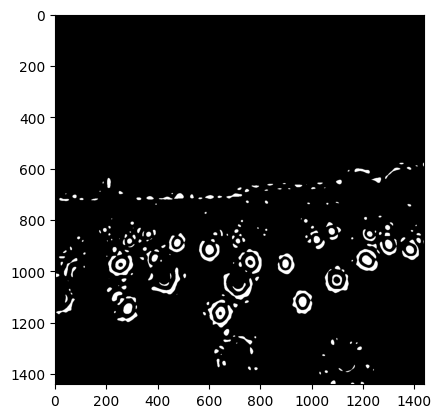

In [230]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def blob_detector(image)

# Load image
image = cv2.imread(im_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[:,:,2]


# cast the image into float 64
image = image.astype(np.float64)

sigma = 10
# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(image, (0,0), sigma)

# Scale the result by sigma^2
scaled_image = blurred_image * (sigma ** 2)
# Apply Laplacian of Gaussian
log_image = cv2.Laplacian(scaled_image, cv2.CV_64F)

# Convert back to uint8
log_image_formatted = np.uint8(np.absolute(log_image))

# Threshold the image (optional, depending on desired result)
_, thresholded = cv2.threshold(log_image_formatted, 50, 255, cv2.THRESH_BINARY)

# Display the result
plt.imshow(thresholded, cmap='gray')

plt.show()


In [242]:


def blob_detector(image, sigma, th_ = False, th = 50):

  import cv2
  import numpy as np
  import matplotlib.pyplot as plt
  # Load image



  # cast the image into float 64
  image = image.astype(np.float64)


  # Apply Gaussian blur
  blurred_image = cv2.GaussianBlur(image, (0,0), sigma)

  # Scale the result by sigma^2
  scaled_image = blurred_image * (sigma ** 2)
  # Apply Laplacian of Gaussian
  log_image = cv2.Laplacian(scaled_image, cv2.CV_64F)

  # Convert back to uint8
  log_image_formatted = np.uint8(np.absolute(log_image))

  # Threshold the image (optional, depending on desired result)
  if th_ == True:
    _, thresholded = cv2.threshold(log_image_formatted, th, 255, cv2.THRESH_BINARY)
  else:
    thresholded = log_image_formatted

  return thresholded


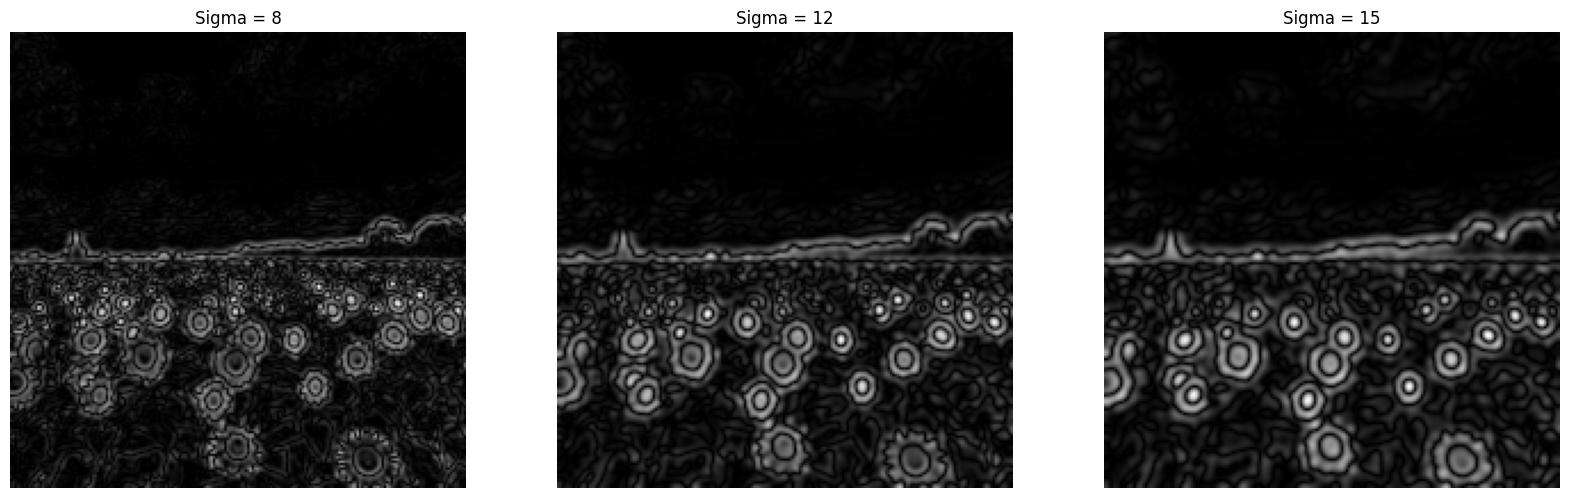

In [275]:
image = cv2.imread(im_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[:,:,2]

# th = 50
# sigma = 10
# thresholded = blob_detector(image, sigma, False, 10)

sigmas = [8, 12, 15]
scaleSpace = np.zeros((len(sigmas), 200, 200))
for sigma in sigmas:
  thresholded = blob_detector(image, sigma)
  # resize the image to a lower resolution
  thresholded = cv.resize(thresholded, (200,200))
  scaleSpace[sigmas.index(sigma)] = thresholded



# plot all the images in the scaleSpace
fig, ax = plt.subplots(1, len(sigmas), figsize=(20, 10))
for i in range(len(sigmas)):
  ax[i].imshow(scaleSpace[i], cmap='gray')
  ax[i].set_title(f'Sigma = {sigmas[i]}')
  ax[i].axis('off')






In [265]:
 np.count_nonzero(scaleSpace[0])


1516763

In [276]:
import numpy as np

def NMS(input_array, n):
    depth, height, width = input_array.shape
    radius = n // 2
    output_array = input_array.copy()

    for z in range(depth):
        for y in range(height):
            for x in range(width):
                z_min, z_max = max(z - radius, 0), min(z + radius + 1, depth)
                y_min, y_max = max(y - radius, 0), min(y + radius + 1, height)
                x_min, x_max = max(x - radius, 0), min(x + radius + 1, width)

                window = input_array[z_min:z_max, y_min:y_max, x_min:x_max]
                max_value = np.max(window)

                output_array[z, y, x] = max_value if input_array[z, y, x] >= max_value else 0

    return output_array


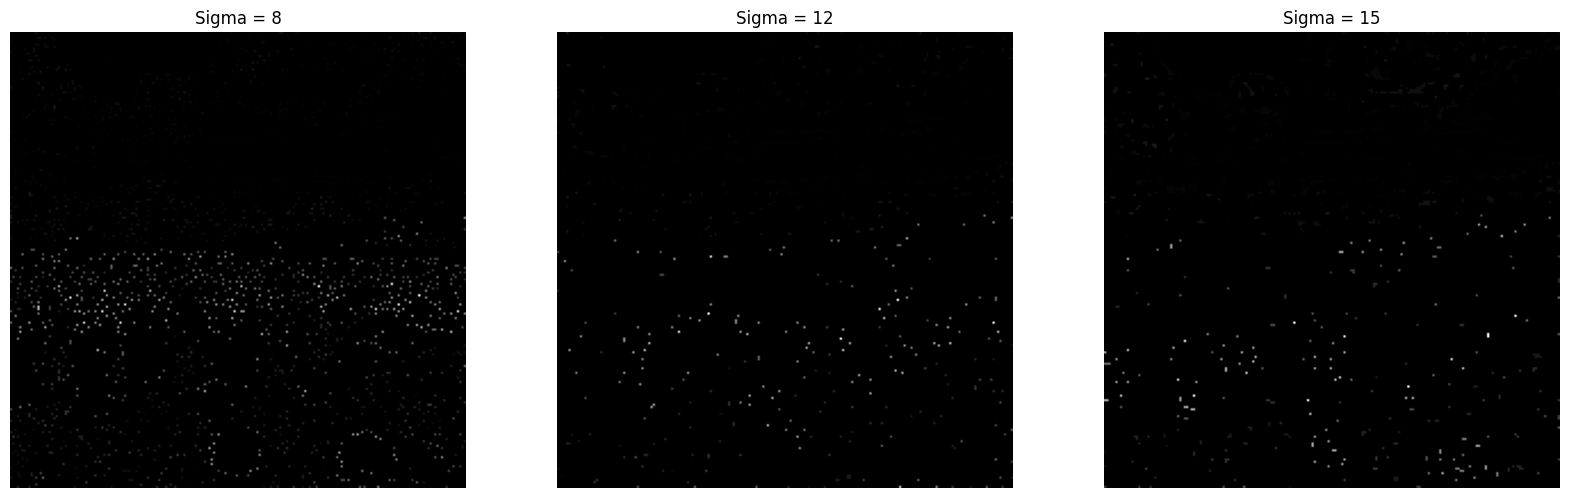

In [278]:
NMS_scaleSpace = NMS(scaleSpace, 3)
NMS_scaleSpace = NMS(NMS_scaleSpace, 3)
# plot all the images in the scaleSpace
fig, ax = plt.subplots(1, len(sigmas), figsize=(20, 10))
for i in range(len(sigmas)):
  ax[i].imshow(NMS_scaleSpace[i], cmap='gray')
  ax[i].set_title(f'Sigma = {sigmas[i]}')
  ax[i].axis('off')

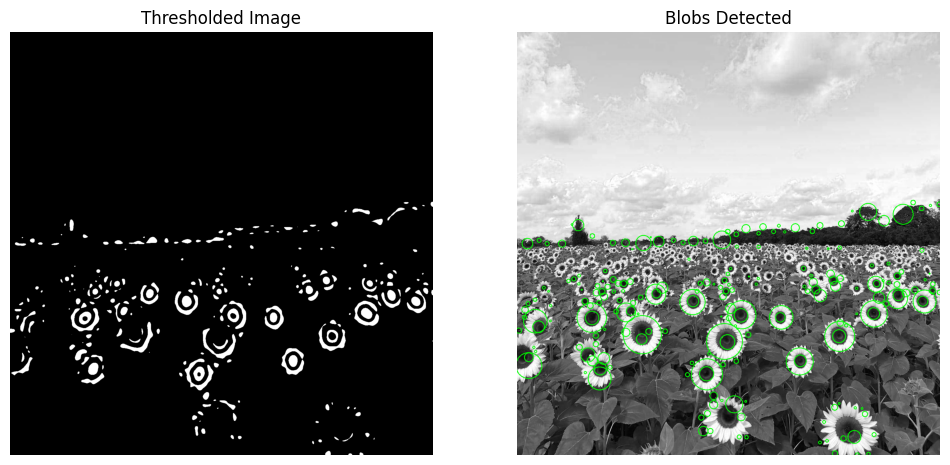

In [281]:
def blob_detector(image, sigma, th_=False, th=50):
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

    # Load image and cast it into float64
    image = image.astype(np.float64)

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)

    # Scale the result by sigma^2
    scaled_image = blurred_image * (sigma ** 2)

    # Apply Laplacian of Gaussian
    log_image = cv2.Laplacian(scaled_image, cv2.CV_64F)

    # Convert back to uint8
    log_image_formatted = np.uint8(np.absolute(log_image))

    # Threshold the image (optional, depending on desired result)
    if th_:
        _, thresholded = cv2.threshold(log_image_formatted, th, 255, cv2.THRESH_BINARY)
    else:
        thresholded = log_image_formatted

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the original image to draw circles
    output_image = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_GRAY2BGR)  # Convert to BGR for drawing

    for contour in contours:
        # Ignore small contours that may not be blobs
        if cv2.contourArea(contour) > 10:  # Adjust this threshold as needed
            # Get the coordinates of the enclosing circle
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)

            # Draw the circle on the output image
            cv2.circle(output_image, center, radius, (0, 255, 0), 2)  # Green circle

    return output_image, thresholded

# Example usage
if __name__ == "__main__":
    # Load your image (grayscale)
    image = cv2.imread(im_path, cv2.IMREAD_COLOR)
    input_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[:,:,2]


    # Detect blobs
    output_image, thresholded = blob_detector(input_image, sigma=10, th_=True, th=50)

    # Display the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Thresholded Image')
    plt.imshow(thresholded, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Blobs Detected')
    plt.imshow(output_image)
    plt.axis('off')

    plt.show()


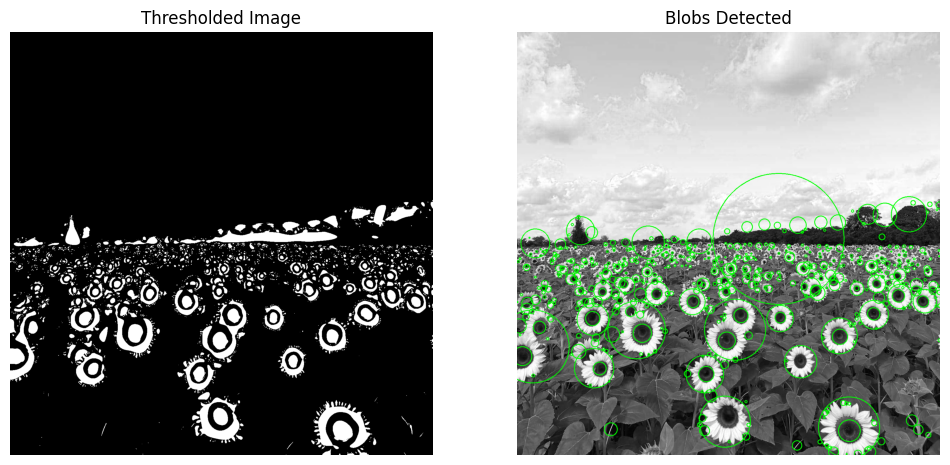

In [285]:
def blob_detector(image, sigmas, th_=False, th=50):
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

    # Load image and cast it into float64
    image = image.astype(np.float64)

    # Initialize a list to hold responses at different scales
    responses = []

    for sigma in sigmas:
        # Apply Gaussian blur
        blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)

        # Scale the result by sigma^2
        scaled_image = blurred_image * (sigma ** 2)

        # Apply Laplacian of Gaussian
        log_image = cv2.Laplacian(scaled_image, cv2.CV_64F)

        # Convert back to uint8
        log_image_formatted = np.uint8(np.absolute(log_image))

        # Store the response
        responses.append(log_image_formatted)

    # Combine the responses for scale-space extrema detection
    combined_response = np.maximum.reduce(responses)

    # Threshold the image (optional, depending on desired result)
    if th_:
        _, thresholded = cv2.threshold(combined_response, th, 255, cv2.THRESH_BINARY)
    else:
        thresholded = combined_response

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the original image to draw circles
    output_image = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_GRAY2BGR)  # Convert to BGR for drawing

    for contour in contours:
        # Ignore small contours that may not be blobs
        if cv2.contourArea(contour) > 10:  # Adjust this threshold as needed
            # Get the coordinates of the enclosing circle
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)

            # Draw the circle on the output image
            cv2.circle(output_image, center, radius, (0, 255, 0), 2)  # Green circle

    return output_image, thresholded

# Example usage
if __name__ == "__main__":
    # Load your image (grayscale)
    image = cv2.imread(im_path, cv2.IMREAD_COLOR)
    input_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[:,:,2]

    # List of sigmas for scale space
    sigmas = [2, 5, 8, 10, 15, 20, 25]  # Adjust this list as needed

    # Detect blobs
    output_image, thresholded = blob_detector(input_image, sigmas, th_=True, th=50)

    # Display the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Thresholded Image')
    plt.imshow(thresholded, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Blobs Detected')
    plt.imshow(output_image)
    plt.axis('off')

    plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [250]:
# Create a sample 3D array (e.g., 5x5x5)
input_array = np.random.randint(0, 100, (5, 5, 5))

print("Input Array:")
print(input_array)

# Apply the suppression filter with a 3x3x3 window
filtered_array = NMS(input_array, 3)

print("\nFiltered Array:")
print(filtered_array)


Input Array:
[[[20 32 60 23 86]
  [59 51 15 89 41]
  [54 56 28 16 68]
  [51 45 22 96 26]
  [93 59 72 53 66]]

 [[95 14 15 74 96]
  [32 98 98 51 57]
  [ 2 14 63 16 28]
  [15 32 20 13 38]
  [28 94 96 96  8]]

 [[ 0 21 41 52 63]
  [77  1 79 11 85]
  [26 47 95 59  5]
  [99 88 90 86 43]
  [11 84  7 85 23]]

 [[16  7  8 22 94]
  [80 27 20 19 91]
  [87 38 38 53 69]
  [ 2 33 91 91 17]
  [49 57 90 68  8]]

 [[89 15 73 56 60]
  [83 19 41 94 48]
  [22 94 64 88 98]
  [92 42 84  0 77]
  [76 27 68  7 72]]]

Filtered Array:
[[[ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0 96  0]
  [ 0  0  0  0  0]]

 [[ 0  0  0  0 96]
  [ 0 98 98  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0 96 96  0]]

 [[ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [99  0  0  0  0]
  [ 0  0  0  0  0]]

 [[ 0  0  0  0 94]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[89  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0 94  0  0 98]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]]


In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, feature, exposure
img = cv.imread(im_path, cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2HSV)[:,:,2]
img = exposure.equalize_hist(img)  # improves detection
feature.blob_log(img, threshold = .3)



error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


ValueError: too many values to unpack (expected 3)

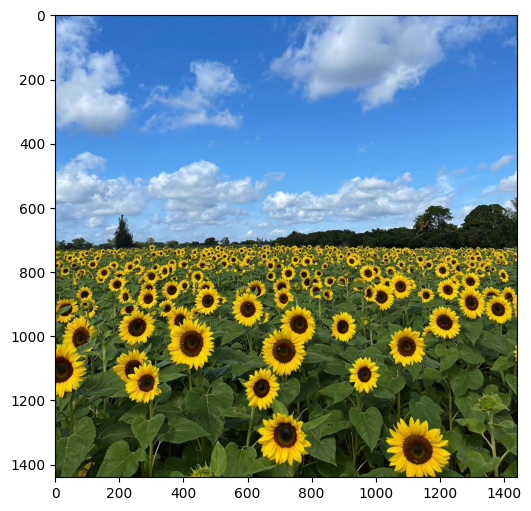

In [28]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage import feature, exposure
from skimage.color import rgb2gray
# image path
im_path = "/content/drive/MyDrive/ImageProcessing/Images-20240814/fitting/the_berry_farms_sunflower_field.jpeg"

img = cv.imread(im_path, cv.IMREAD_COLOR)

# Convert to grayscale (using the value channel from HSV)
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray_img = img_hsv[:,:,0]  # Using the V (Value) channel

# Histogram equalization to improve contrast for blob detection
equalized_img = exposure.equalize_hist(gray_img)

# Detect blobs using Laplacian of Gaussian (LoG)
blobs = feature.blob_log(img, min_sigma = 30 ,max_sigma=30, num_sigma=1, threshold=0.1, overlap = 0.3)

# Compute radii for the blobs
blobs[:, 2] = blobs[:, 2] * np.sqrt(2)

# Plot the original image with blobs detected
fig, ax = plt.subplots(figsize=(10, 6))
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
ax.imshow(img_rgb)

# Draw circles for each detected blob
for blob in blobs:
    y, x, r = blob
    circ = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(circ)

# Show the final image with detected blobs
plt.title('Blobs Detected with LoG')
plt.axis('off')
plt.show()


In [22]:
>>> from skimage import data, feature, exposure
>>> img = data.coins()
>>> img = exposure.equalize_hist(img)  # improves detection
>>> feature.blob_log(img, threshold = .3)


array([[124.        , 336.        ,  11.88888889],
       [198.        , 155.        ,  11.88888889],
       [194.        , 213.        ,  17.33333333],
       [121.        , 272.        ,  17.33333333],
       [263.        , 244.        ,  17.33333333],
       [194.        , 276.        ,  17.33333333],
       [266.        , 115.        ,  11.88888889],
       [128.        , 154.        ,  11.88888889],
       [260.        , 174.        ,  17.33333333],
       [198.        , 103.        ,  11.88888889],
       [126.        , 208.        ,  11.88888889],
       [127.        , 102.        ,  11.88888889],
       [263.        , 302.        ,  17.33333333],
       [197.        ,  44.        ,  11.88888889],
       [185.        , 344.        ,  17.33333333],
       [126.        ,  46.        ,  11.88888889],
       [113.        , 323.        ,   1.        ]])

### Finalized working code

Largest Blob - X: 0, Y: 275, Radius: 10 pixels
Range of σ values used: [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10. ]


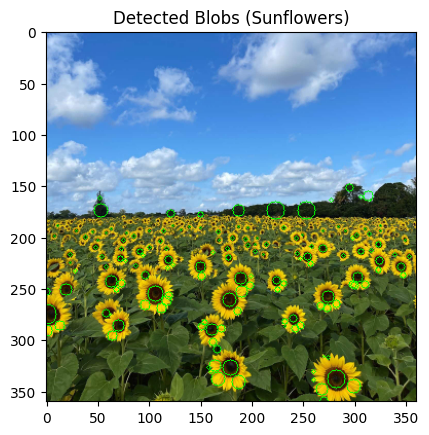

In [68]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the sunflower field image with reduced color
im = cv.imread(im_path, cv.IMREAD_REDUCED_COLOR_4)
gray_im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Parameters
sigmas = np.linspace(1, 10, 19)  # Define the range of sigma values
k = 1.2  # Scale multiplier for LoG
threshold = 60

# Create the scale-space representation
scale_space = []
for sigma in sigmas:
    # Apply Gaussian blur with increasing sigma values
    # cast gray_im to float 64
    gray_im = gray_im.astype(np.float64)

    blurred = cv.GaussianBlur(gray_im, (0, 0), sigma) * sigma ** 2

    # Compute the Laplacian (approximating LoG by applying Laplacian after Gaussian)
    laplacian = cv.Laplacian(blurred, cv.CV_64F)

    # Square the Laplacian to get blob-like structures and store in scale-space
    scale_space.append(abs(laplacian))

# Convert the scale-space list into a 3D numpy array for easier extrema detection
scale_space = np.stack(scale_space, axis=-1)

# Non-maximum suppression across scales to detect blobs
blob_coords = []
# Pad the scale_space to handle the border conditions
padded_scale_space = np.pad(scale_space, ((1, 1), (1, 1), (1, 1)), mode='constant')

# Iterate through the original scale_space and perform 3x3xN non-maximum suppression
depth = len(sigmas)  # Depth of the scale-space
for i in range(1, padded_scale_space.shape[0] - 1):
    for j in range(1, padded_scale_space.shape[1] - 1):
        # Extract a 3x3xN volume around the pixel in both spatial and scale dimensions
        neighborhood = padded_scale_space[i-1:i+2, j-1:j+2, 1:-1]

        # Check if the center pixel is the maximum in its 3x3xN neighborhood
        if padded_scale_space[i, j, 1:-1].max() > threshold and padded_scale_space[i, j, 1:-1].max() == np.max(neighborhood):
            # Get the sigma index (scale) where the max occurred
            scale_idx = np.argmax(padded_scale_space[i, j, 1:-1])

            # Store the coordinates of the detected blob (with sigma information)
            blob_coords.append((i-1, j-1, sigmas[scale_idx]))

# Draw circles around detected blobs
output_image = im.copy()
largest_blob = None

for y, x, sigma in blob_coords:
    radius = int(sigma * np.sqrt(2))  # Radius proportional to sigma
    cv.circle(output_image, (x, y), radius, (0, 255, 0), 1)

    # Track the largest blob (largest radius)
    if largest_blob is None or radius > largest_blob[2]:
        largest_blob = (x, y, radius)

# Report the largest blob's parameters
if largest_blob:
    print(f"Largest Blob - X: {largest_blob[0]}, Y: {largest_blob[1]}, Radius: {largest_blob[2]} pixels")

# Report the range of sigma values used
print(f"Range of σ values used: {sigmas}")

# Display the image with detected blobs
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.title("Detected Blobs (Sunflowers)")
plt.show()
